$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

In [9]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

# Convert features and target variables to DataFrames
X_df = pd.DataFrame(X, columns=student_performance.variables.name[:-3])  # Exclude target variables G1, G2, G3
y_df = pd.DataFrame(y, columns=['G1', 'G2', 'G3'])

# Concatenate features and target variables along columns axis
df = pd.concat([X_df, y_df], axis=1)

# Display the first few rows of the DataFrame
print(df.head())

# Explore the structure of the DataFrame
print(df.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (to

Classification Report for G1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         9
           8       0.21      0.20      0.21        15
           9       0.21      0.36      0.26        14
          10       0.04      0.04      0.04        26
          11       0.16      0.15      0.15        27
          12       0.07      0.09      0.08        23
          13       0.15      0.17      0.16        24
          14       0.19      0.24      0.21        21
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         6
          17       0.50      0.11      0.18         9
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         1

    accuracy                           0.13       

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

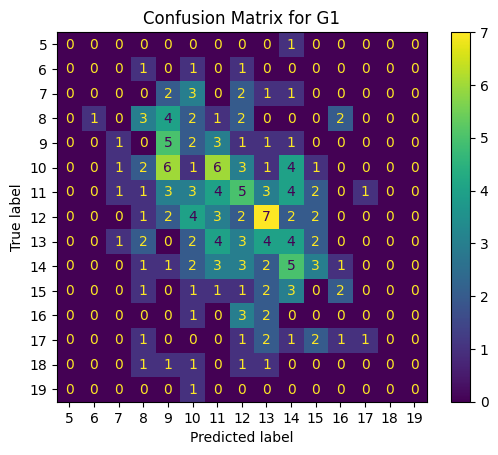

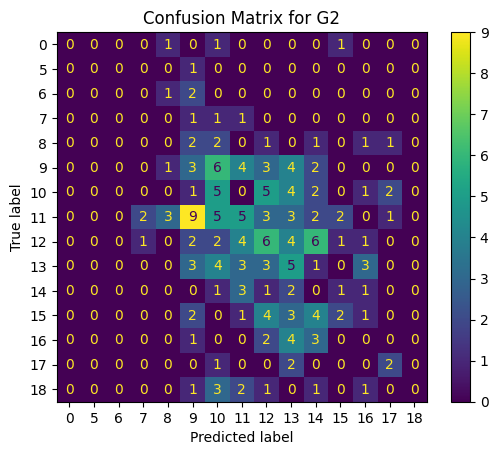

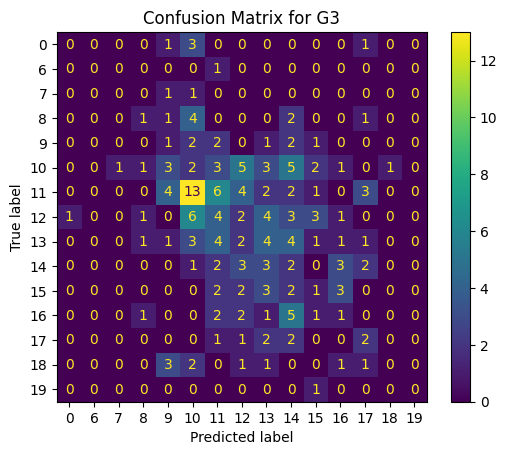

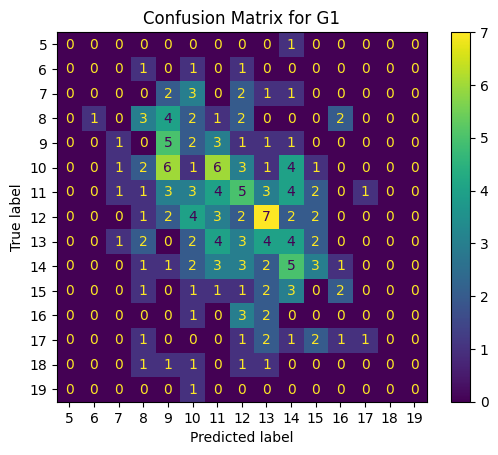

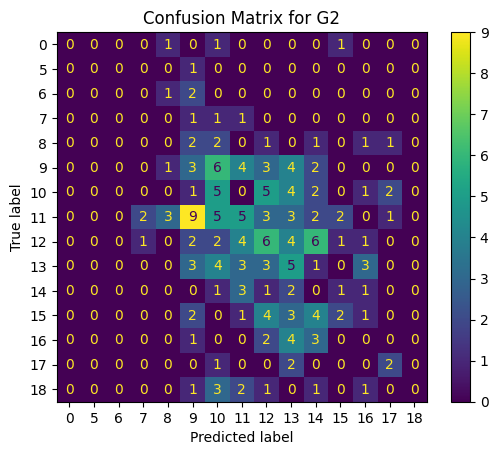

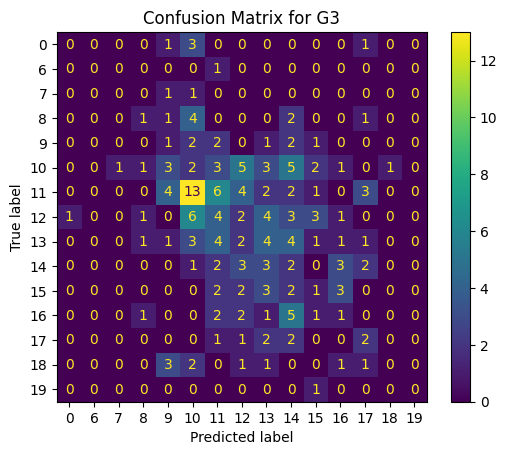

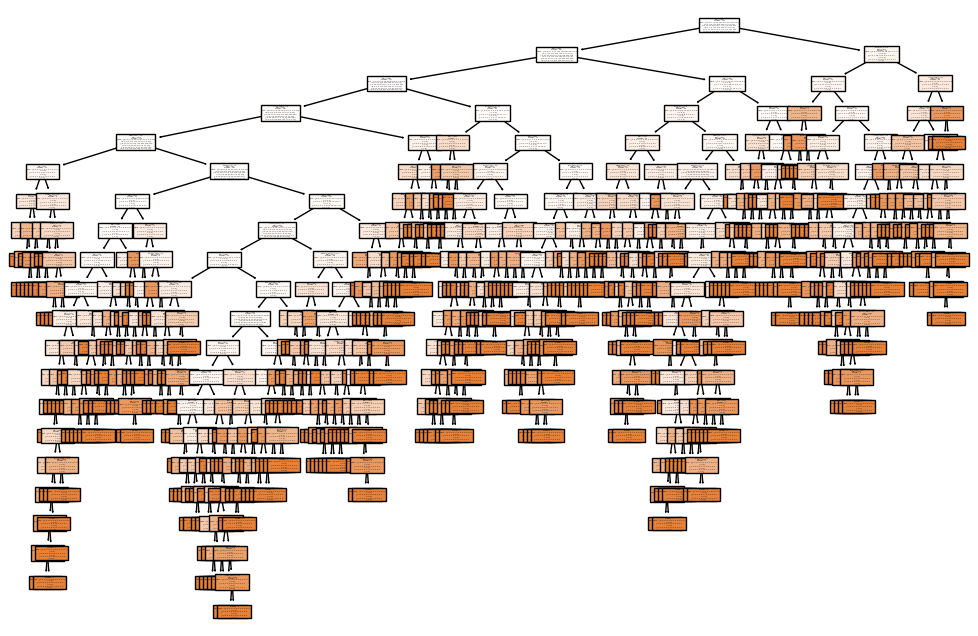

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['G1', 'G2', 'G3']), df[['G1', 'G2', 'G3']], test_size=0.3, random_state=42)

# Step 2: Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Step 3: Build a Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train_encoded, y_train)

# Step 4: Evaluate the Model for each target variable
y_pred = model.predict(X_test_encoded)

for i in range(len(y_test.columns)):
    target_variable = y_test.columns[i]
    print(f"Classification Report for {target_variable}:")
    print(classification_report(y_test[target_variable], y_pred[:, i]))
    print("\n")

# Compute and display the confusion matrix for each target variable
for i in range(len(y_test.columns)):
    target_variable = y_test.columns[i]
    unique_labels = sorted(y_test[target_variable].unique())  # Get unique labels
    cm = confusion_matrix(y_test[target_variable], y_pred[:, i], labels=unique_labels)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    cmd.plot()
    plt.title(f"Confusion Matrix for {target_variable}")
    plt.show()


# Display the confusion matrix for each target variable
for i in range(len(y_test.columns)):
    target_variable = y_test.columns[i]
    unique_labels = sorted(y_test[target_variable].unique())  # Get unique labels
    cm = confusion_matrix(y_test[target_variable], y_pred[:, i], labels=unique_labels)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    cmd.plot()
    plt.title(f"Confusion Matrix for {target_variable}")
    plt.show()

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train_encoded.columns, class_names=['G1', 'G2', 'G3'])
plt.show()
